# Import Data

In [ ]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
sns.set()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EEG-Data/EEG.machinelearing_data_BRMH.csv')

In [ ]:
df.head()

no. sex   age    eeg.date  education     IQ       main.disorder  \
0    1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1    2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2    3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3    4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4    5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   

      specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  Alcohol use disorder         35.998557         21.717375        21.518280   
1  Alcohol use disorder         13.425118         11.002916        11.942516   
2  Alcohol use disorder         29.941780         27.544684        17.150159   
3  Alcohol use disorder         21.496226         21.846832        17.364316   
4  Alcohol use disorder         37.775667         33.607679        21.865556   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        26.825048        26.611516        25.732649        16.563408   
1        15.272216        14.151570        12.456034         8.436832   
2        23.608960        27.087811        13.541237        16.523963   
3        13.833701        14.100954        13.100939        14.613650   
4        21.771413        22.854536        21.456377        15.969042   

   AB.A.delta.h.T3  AB.A.delta.i.C3  AB.A.delta.j.Cz  AB.A.delta.k.C4  \
0        29.891368        22.402246        22.582176        23.987650   
1         9.975238        14.834740        10.950564        12.742712   
2        12.775574        21.686306        18.367666        20.293571   
3         8.063191        11.015078        11.639560         8.816415   
4         9.434306        15.244523        17.041979        17.712593   

   AB.A.delta.l.T4  AB.A.delta.m.T5  AB.A.delta.n.P3  AB.A.delta.o.Pz  \
0        14.741769        16.271815        18.376257        16.447620   
1         6.230904        11.238420        14.767063        15.653628   
2        11.946956        11.063130        20.956259        18.946034   
3         8.456443        17.676429         9.959183         9.877650   
4        18.278851        15.449687         9.239752        13.154119   

   AB.A.delta.p.P4  AB.A.delta.q.T6  AB.A.delta.r.O1  AB.A.delta.s.O2  \
0        16.409822        11.777727        18.278916        17.243432   
1        13.290791         8.538482        14.740076         9.326202   
2        16.965524        11.242449        11.812897         9.385839   
3        10.098478        10.612230        12.782252         8.645818   
4        34.529365        19.541089        10.434374        17.268496   

   AB.B.theta.a.FP1  AB.B.theta.b.FP2  AB.B.theta.c.F7  AB.B.theta.d.F3  \
0         17.718246         16.192495        14.915559        21.651286   
1         11.768909          8.725535         9.201389        13.089875   
2         23.301782         19.889236        12.670295        19.468802   
3          9.459105          8.346581         7.146427         9.349048   
4          8.672135          8.461829         6.009767         9.227666   

   AB.B.theta.e.Fz  AB.B.theta.f.F4  AB.B.theta.g.F8  AB.B.theta.h.T3  \
0        22.795144        19.884898        11.974900        12.784247   
1        12.350967         9.711676         5.298104         6.413413   
2        20.835590        11.413157        10.572396        10.271465   
3         9.989677         8.294223         5.129463         4.673410   
4        10.145943         9.028607         5.611287         3.445666   

   AB.B.theta.i.C3  AB.B.theta.j.Cz  AB.B.theta.k.C4  AB.B.theta.l.T4  \
0        16.841048        19.056095        15.268866         8.689380   
1        10.777291         7.328993         8.045258         3.074612   
2        18.276336        16.211813        14.983080         8.125448   
3         7.257602         8.497067         6.502563         4.070429   
4         7.178336         9.036934         8.208113         7.910589   

   AB.B.theta.m.

In [ ]:
df["main.disorder"].unique()

array(['Addictive disorder', 'Trauma and stress related disorder',
       'Mood disorder', 'Healthy control',
       'Obsessive compulsive disorder', 'Schizophrenia',
       'Anxiety disorder'], dtype=object)

In [ ]:
df["specific.disorder"].unique()

array(['Alcohol use disorder', 'Acute stress disorder',
       'Depressive disorder', 'Healthy control',
       'Behavioral addiction disorder', 'Obsessive compulsitve disorder',
       'Schizophrenia', 'Panic disorder', 'Social anxiety disorder',
       'Posttraumatic stress disorder', 'Adjustment disorder',
       'Bipolar disorder'], dtype=object)

In [ ]:
#function to rename
def reformat_name(name):
    '''
    reformat from XX.X.band.x.channel to band.channel or
    COH.X.band.x.channel1.x.channel2 to COH.band.channel1.channel2
    '''
    splitted = name.split(sep='.')
    if len(splitted) < 5:
        return name
    if splitted[0] != 'COH':
        result = f'{splitted[2]}.{splitted[4]}'
    else:
        result = f'{splitted[0]}.{splitted[2]}.{splitted[4]}.{splitted[6]}'
    return result
# rename columns
df.rename(reformat_name, axis=1, inplace=True)
df

no. sex   age    eeg.date  education     IQ       main.disorder  \
0      1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1      2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2      3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3      4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4      5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   
..   ...  ..   ...         ...        ...    ...                 ...   
940  941   M  22.0   2014.8.28       13.0  116.0     Healthy control   
941  942   M  26.0   2014.9.19       13.0  118.0     Healthy control   
942  943   M  26.0   2014.9.27       16.0  113.0     Healthy control   
943  944   M  24.0   2014.9.20       13.0  107.0     Healthy control   
944  945   M  21.0  2015.10.23       13.0  105.0     Healthy control   

        specific.disorder  delta.FP1  delta.FP2   delta.F7   delta.F3  \
0    Alcohol use disorder  35.998557  21.717375  21.518280  26.825048   
1    Alcohol use disorder  13.425118  11.002916  11.942516  15.272216   
2    Alcohol use disorder  29.941780  27.544684  17.150159  23.608960   
3    Alcohol use disorder  21.496226  21.846832  17.364316  13.833701   
4    Alcohol use disorder  37.775667  33.607679  21.865556  21.771413   
..                    ...        ...        ...        ...        ...   
940       Healthy control  41.851823  36.771496  43.671792  36.860889   
941       Healthy control  18.986856  19.401387  27.586436  20.194732   
942       Healthy control  28.781317  32.369230  11.717778  23.134370   
943       Healthy control  19.929100  25.196375  14.445391  16.453456   
944       Healthy control  65.195346  69.241972  35.361363  28.089348   

      delta.Fz   delta.F4   delta.F8   delta.T3   delta.C3   delta.Cz  \
0    26.611516  25.732649  16.563408  29.891368  22.402246  22.582176   
1    14.151570  12.456034   8.436832   9.975238  14.834740  10.950564   
2    27.087811  13.541237  16.523963  12.775574  21.686306  18.367666   
3    14.100954  13.100939  14.613650   8.063191  11.015078  11.639560   
4    22.854536  21.456377  15.969042   9.434306  15.244523  17.041979   
..         ...        ...        ...        ...        ...        ...   
940  24.732236  23.607823  23.288260   7.520642  17.636528  20.220791   
941  19.407491  20.216570  16.465027  13.178851  12.687296  20.257619   
942  26.209302  25.484497  22.586688  11.368466  21.799254  36.083181   
943  16.590649  16.007279  18.909188  13.438102  17.442777  18.859586   
944  35.475808  36.804968  69.071230   6.905352  22.623165  31.587806   

      delta.C4   delta.T4   delta.T5   delta.P3   delta.Pz   delta.P4  \
0    23.987650  14.741769  16.271815  18.376257  16.447620  16.409822   
1    12.742712   6.230904  11.238420  14.767063  15.653628  13.290791   
2    20.293571  11.946956  11.063130  20.956259  18.946034  16.965524   
3     8.816415   8.456443  17.676429   9.959183   9.877650  10.098478   
4    17.712593  18.278851  15.449687   9.239752  13.154119  34.529365   
..         ...        ...        ...        ...        ...        ...   
940  17.507875  10.006887  15.013644  16.646515  18.543016  17.795970   
941  17.848038  15.961006  11.674384  13.396309  17.936563  18.973236   
942  19.645584  11.824302   9.879796  12.276341  17.857825  13.229396   
943  16.813892  10.601103  17.471617  22.704123  16.102977  21.425131   
944  32.736499  37.986094  10.978654  19.268440  25.892553  26.065162   

      delta.T6   delta.O1   delta.O2  theta.FP1  theta.FP2   theta.F7  \
0    11.777727  18.278916  17.243432  17.718246  16.192495  14.915559   
1     8.538482  14.740076   9.326202  11.768909   8.725535   9.201389   
2    11.242449  11.812897   9.385839  23.301782  19.889236  12.670295   
3    10.612230  12.782252   8.645818   9.459105   8.346581   7.146427   
4    19.541089  10.434374  17.268496   8.672135   8.461829   6.009767   
..         ...        ...        ...        ...        ...        ...  

In [ ]:
typo_ind = df[df['specific.disorder'] == 'Obsessive compulsitve disorder'].index
df.loc[typo_ind, 'specific.disorder'] = 'Obsessive compulsive disorder'

# Missing Data

In [ ]:
missing = df.isna().sum()
sep_col = missing[missing == df.shape[0]].index[0]
sep_col

'Unnamed: 122'

In [ ]:
educ_na = df[df['education'].isna()]
iq_na = df[df['IQ'].isna()]
educ_iq_na = pd.concat([educ_na, iq_na]).drop_duplicates()
educ_iq_na

no. sex    age    eeg.date  education     IQ  \
0      1   M  57.00   2012.8.30        NaN    NaN   
17    18   M  30.00   2013.9.27        NaN   86.0   
21    22   M  20.00  2014.10.23        NaN  116.0   
155  156   M  18.00   2013.12.7        NaN  103.0   
173  174   M  23.00  2015.11.14        NaN  113.0   
269  270   M  25.00   2015.9.23        NaN   85.0   
270  271   M  34.00   2015.9.21        NaN  120.0   
279  280   M  35.00    2016.6.2        NaN    NaN   
280  281   M  37.00   2016.6.27        NaN  110.0   
281  282   M  22.00   2016.6.30        NaN  107.0   
384  385   F  51.38  2011.12.27        NaN   97.0   
417  418   F  53.67   2013.4.18        NaN  101.0   
433  434   M  34.16   2013.4.11        NaN  142.0   
845  846   M  21.29   2013.3.25        NaN   82.0   
920  921   M  24.00    2013.2.1        NaN  114.0   
33    34   F  19.26    2013.8.5       12.0    NaN   
38    39   F  19.47   2014.5.26       12.0    NaN   
42    43   F  32.94  2014.10.16       16.0    NaN   
43    44   F  22.65   2014.11.8       13.0    NaN   
60    61   M  34.00   2016.3.10       12.0    NaN   
92    93   F  39.18    2017.3.3       16.0    NaN   
93    94   F  28.42   2017.3.20        9.0    NaN   
223  224   M  19.00   2016.7.12       12.0    NaN   
225  226   M  20.00   2016.9.13       13.0    NaN   
234  235   M  20.00  2017.11.22       13.0    NaN   
278  279   M  21.00   2016.5.13       15.0    NaN   

                          main.disorder              specific.disorder  \
0                    Addictive disorder           Alcohol use disorder   
17                   Addictive disorder           Alcohol use disorder   
21                   Addictive disorder           Alcohol use disorder   
155                  Addictive disorder  Behavioral addiction disorder   
173                     Healthy control                Healthy control   
269       Obsessive compulsive disorder  Obsessive compulsive disorder   
270       Obsessive compulsive disorder  Obsessive compulsive disorder   
279       Obsessive compulsive disorder  Obsessive compulsive disorder   
280       Obsessive compulsive disorder  Obsessive compulsive disorder   
281       Obsessive compulsive disorder  Obsessive compulsive disorder   
384                       Mood disorder            Depressive disorder   
417  Trauma and stress related disorder  Posttraumatic stress disorder   
433                    Anxiety disorder                 Panic disorder   
845                       Mood disorder               Bipolar disorder   
920                     Healthy control                Healthy control   
33   Trauma and stress related disorder          Acute stress disorder   
38   Trauma and stress related disorder          Acute stress disorder   
42   Trauma and stress related disorder          Acute stress disorder   
43   Trauma and stress related disorder          Acute stress disorder   
60                   Addictive disorder           Alcohol use disorder   
92                        Mood disorder            Depressive disorder   
93                        Mood disorder            Depressive disorder   
223                  Addictive disorder  Behavioral addiction disorder   
225                  Addictive disorder  Behavioral addiction disorder   
234                  Addictive disorder  Behavioral addiction disorder   
278       Obsessive compulsive disorder  Obsessive compulsive disorder   

     delta.FP1  delta.FP2   delta.F7   delta.F3   delta.Fz   delta.F4  \
0    35.998557  21.717375  21.518280  26.825048  26.611516  25.732649   
17   12.443237  12.503703  12.015677  12.327700  12.045486  11.446219   
21   28.287190  22.412264  27.143447  18.874722  21.997772  23.882852   
155  16.548803  19.042179  14.838458  19.456932  33.760631  26.616743   
173  19.050158  23.277470  14.120051  23.755081  28.659299  30.531567   
269   6.186264   7.112847   7.322093   5.951546   9.086616   6.250456   
270  12.784872  15.922964  11.926196  10.567900  17.169113  11.

In [ ]:
drop_md = educ_iq_na['specific.disorder'].value_counts().sort_index()
all_md = df['specific.disorder'].value_counts().sort_index()[drop_md.index]
pd.concat([all_md, drop_md/all_md * 100], axis=1).set_axis(['all_data', 'na_percentage'], axis=1).sort_values('na_percentage', ascending=False)

all_data  na_percentage
specific.disorder                                     
Obsessive compulsive disorder        46      13.043478
Acute stress disorder                38      10.526316
Alcohol use disorder                 93       4.301075
Behavioral addiction disorder        93       4.301075
Healthy control                      95       2.105263
Posttraumatic stress disorder        52       1.923077
Panic disorder                       59       1.694915
Depressive disorder                 199       1.507538
Bipolar disorder                     67       1.492537

In [ ]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Unnamed: 122    100.000000
education         1.587302
IQ                1.375661
dtype: float64

In [ ]:
# Gets the data type of each column
data_type_column = df.dtypes

# Count the number of missing values ​​in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values ​​in each column
percentage_missing_values = (missing_values / len(df)) * 100

# Combine these results in a DataFrame
summary = pd.DataFrame({'Data Type': data_type_column, 'Total Missing Value': missing_values, 'Percentage of Missing Value': percentage_missing_values})

# Filter only columns that have missing values
column_with_missing_value = summary[summary['Total Missing Value'] > 0]

print(column_with_missing_value)

             Data Type  Total Missing Value  Percentage of Missing Value
education      float64                   15                     1.587302
IQ             float64                   13                     1.375661
Unnamed: 122   float64                  945                   100.000000


In [ ]:
for kolom in column_with_missing_value.index:
  df[kolom].fillna(df[kolom].median(), inplace=True)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
df

no. sex   age    eeg.date  education     IQ       main.disorder  \
0      1   M  57.0   2012.8.30       13.0  102.0  Addictive disorder   
1      2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2      3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3      4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4      5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   
..   ...  ..   ...         ...        ...    ...                 ...   
940  941   M  22.0   2014.8.28       13.0  116.0     Healthy control   
941  942   M  26.0   2014.9.19       13.0  118.0     Healthy control   
942  943   M  26.0   2014.9.27       16.0  113.0     Healthy control   
943  944   M  24.0   2014.9.20       13.0  107.0     Healthy control   
944  945   M  21.0  2015.10.23       13.0  105.0     Healthy control   

        specific.disorder  delta.FP1  delta.FP2   delta.F7   delta.F3  \
0    Alcohol use disorder  35.998557  21.717375  21.518280  26.825048   
1    Alcohol use disorder  13.425118  11.002916  11.942516  15.272216   
2    Alcohol use disorder  29.941780  27.544684  17.150159  23.608960   
3    Alcohol use disorder  21.496226  21.846832  17.364316  13.833701   
4    Alcohol use disorder  37.775667  33.607679  21.865556  21.771413   
..                    ...        ...        ...        ...        ...   
940       Healthy control  41.851823  36.771496  43.671792  36.860889   
941       Healthy control  18.986856  19.401387  27.586436  20.194732   
942       Healthy control  28.781317  32.369230  11.717778  23.134370   
943       Healthy control  19.929100  25.196375  14.445391  16.453456   
944       Healthy control  65.195346  69.241972  35.361363  28.089348   

      delta.Fz   delta.F4   delta.F8   delta.T3   delta.C3   delta.Cz  \
0    26.611516  25.732649  16.563408  29.891368  22.402246  22.582176   
1    14.151570  12.456034   8.436832   9.975238  14.834740  10.950564   
2    27.087811  13.541237  16.523963  12.775574  21.686306  18.367666   
3    14.100954  13.100939  14.613650   8.063191  11.015078  11.639560   
4    22.854536  21.456377  15.969042   9.434306  15.244523  17.041979   
..         ...        ...        ...        ...        ...        ...   
940  24.732236  23.607823  23.288260   7.520642  17.636528  20.220791   
941  19.407491  20.216570  16.465027  13.178851  12.687296  20.257619   
942  26.209302  25.484497  22.586688  11.368466  21.799254  36.083181   
943  16.590649  16.007279  18.909188  13.438102  17.442777  18.859586   
944  35.475808  36.804968  69.071230   6.905352  22.623165  31.587806   

      delta.C4   delta.T4   delta.T5   delta.P3   delta.Pz   delta.P4  \
0    23.987650  14.741769  16.271815  18.376257  16.447620  16.409822   
1    12.742712   6.230904  11.238420  14.767063  15.653628  13.290791   
2    20.293571  11.946956  11.063130  20.956259  18.946034  16.965524   
3     8.816415   8.456443  17.676429   9.959183   9.877650  10.098478   
4    17.712593  18.278851  15.449687   9.239752  13.154119  34.529365   
..         ...        ...        ...        ...        ...        ...   
940  17.507875  10.006887  15.013644  16.646515  18.543016  17.795970   
941  17.848038  15.961006  11.674384  13.396309  17.936563  18.973236   
942  19.645584  11.824302   9.879796  12.276341  17.857825  13.229396   
943  16.813892  10.601103  17.471617  22.704123  16.102977  21.425131   
944  32.736499  37.986094  10.978654  19.268440  25.892553  26.065162   

      delta.T6   delta.O1   delta.O2  theta.FP1  theta.FP2   theta.F7  \
0    11.777727  18.278916  17.243432  17.718246  16.192495  14.915559   
1     8.538482  14.740076   9.326202  11.768909   8.725535   9.201389   
2    11.242449  11.812897   9.385839  23.301782  19.889236  12.670295   
3    10.612230  12.782252   8.645818   9.459105   8.346581   7.146427   
4    19.541089  10.434374  17.268496   8.672135   8.461829   6.009767   
..         ...        ...        ...        ...        ...        ...  

In [ ]:
df.groupby('specific.disorder').size()

specific.disorder
Acute stress disorder             38
Adjustment disorder               38
Alcohol use disorder              93
Behavioral addiction disorder     93
Bipolar disorder                  67
Depressive disorder              199
Healthy control                   95
Obsessive compulsive disorder     46
Panic disorder                    59
Posttraumatic stress disorder     52
Schizophrenia                    117
Social anxiety disorder           48
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(945, 1149)

In [ ]:
df.select_dtypes(include='object').nunique()

sex                    2
eeg.date             722
main.disorder          7
specific.disorder     12
dtype: int64

In [ ]:
df_fix=df.copy()

In [ ]:
df_fix.head()

no. sex   age    eeg.date  education     IQ       main.disorder  \
0    1   M  57.0   2012.8.30       13.0  102.0  Addictive disorder   
1    2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2    3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3    4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4    5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   

      specific.disorder  delta.FP1  delta.FP2   delta.F7   delta.F3  \
0  Alcohol use disorder  35.998557  21.717375  21.518280  26.825048   
1  Alcohol use disorder  13.425118  11.002916  11.942516  15.272216   
2  Alcohol use disorder  29.941780  27.544684  17.150159  23.608960   
3  Alcohol use disorder  21.496226  21.846832  17.364316  13.833701   
4  Alcohol use disorder  37.775667  33.607679  21.865556  21.771413   

    delta.Fz   delta.F4   delta.F8   delta.T3   delta.C3   delta.Cz  \
0  26.611516  25.732649  16.563408  29.891368  22.402246  22.582176   
1  14.151570  12.456034   8.436832   9.975238  14.834740  10.950564   
2  27.087811  13.541237  16.523963  12.775574  21.686306  18.367666   
3  14.100954  13.100939  14.613650   8.063191  11.015078  11.639560   
4  22.854536  21.456377  15.969042   9.434306  15.244523  17.041979   

    delta.C4   delta.T4   delta.T5   delta.P3   delta.Pz   delta.P4  \
0  23.987650  14.741769  16.271815  18.376257  16.447620  16.409822   
1  12.742712   6.230904  11.238420  14.767063  15.653628  13.290791   
2  20.293571  11.946956  11.063130  20.956259  18.946034  16.965524   
3   8.816415   8.456443  17.676429   9.959183   9.877650  10.098478   
4  17.712593  18.278851  15.449687   9.239752  13.154119  34.529365   

    delta.T6   delta.O1   delta.O2  theta.FP1  theta.FP2   theta.F7  \
0  11.777727  18.278916  17.243432  17.718246  16.192495  14.915559   
1   8.538482  14.740076   9.326202  11.768909   8.725535   9.201389   
2  11.242449  11.812897   9.385839  23.301782  19.889236  12.670295   
3  10.612230  12.782252   8.645818   9.459105   8.346581   7.146427   
4  19.541089  10.434374  17.268496   8.672135   8.461829   6.009767   

    theta.F3   theta.Fz   theta.F4   theta.F8   theta.T3   theta.C3  \
0  21.651286  22.795144  19.884898  11.974900  12.784247  16.841048   
1  13.089875  12.350967   9.711676   5.298104   6.413413  10.777291   
2  19.468802  20.835590  11.413157  10.572396  10.271465  18.276336   
3   9.349048   9.989677   8.294223   5.129463   4.673410   7.257602   
4   9.227666  10.145943   9.028607   5.611287   3.445666   7.178336   

    theta.Cz   theta.C4  theta.T4   theta.T5   theta.P3   theta.Pz   theta.P4  \
0  19.056095  15.268866  8.689380  11.256468  14.464448  13.276731  13.247274   
1   7.328993   8.045258  3.074612   7.016035  10.370045  11.234658   8.603103   
2  16.211813  14.983080  8.125448   9.542317  16.244603  16.182878  12.399733   
3   8.497067   6.502563  4.070429   7.520922   6.264068   7.076124   6.898702   
4   9.036934   8.208113  7.910589   6.669741   5.962465   8.594797  12.815735   

   theta.T6   theta.O1   theta.O2  alpha.FP1  alpha.FP2   alpha.F7   alpha.F3  \
0  7.718878  13.961118  11.405713  43.483254  43.949575  35.778170  47.101300   
1  3.876353   7.077455   6.583032  33.852363  27.914361  22.454272  33.012434   
2  7.837362   8.878944   6.531020  35.582168  30.715669  19.617060  26.865173   
3  4.748773   4.494487   3.975982  30.551722  28.203285  21.782643  32.646973   
4  7.936189   5.883821   8.240325  25.128998  26.133568  16.956782  28.170561   

    alpha.Fz   alpha.F4   alpha.F8   alpha.T3   alpha.C3   alpha.Cz  \
0  51.526595  48.728052  32.360718  28.361474  40.246028  47.067822   
1  35.582111  31.222377  16.653487  12.466640  30.765292  29.192492   
2  28.835152  15.022820  15.638122  11.637642  22.208026  23.100922   
3  35.566931  28.347619  15.633584  14.054834  24.968211  40.826232   
4  32.365566  30.296769  20.189603  10.926501  24.107841  32.101847   

    alpha.C4   alpha.T4   alpha.T5   alpha.P3 

In [ ]:
df_fix=df_fix.drop([sep_col, 'no.', 'eeg.date','main.disorder'], axis=1).copy(deep=True)

In [ ]:
df_fix.dtypes

sex                   object
age                  float64
education            float64
IQ                   float64
specific.disorder     object
                      ...   
COH.gamma.P4.O1      float64
COH.gamma.P4.O2      float64
COH.gamma.T6.O1      float64
COH.gamma.T6.O2      float64
COH.gamma.O1.O2      float64
Length: 1145, dtype: object

# Visualization


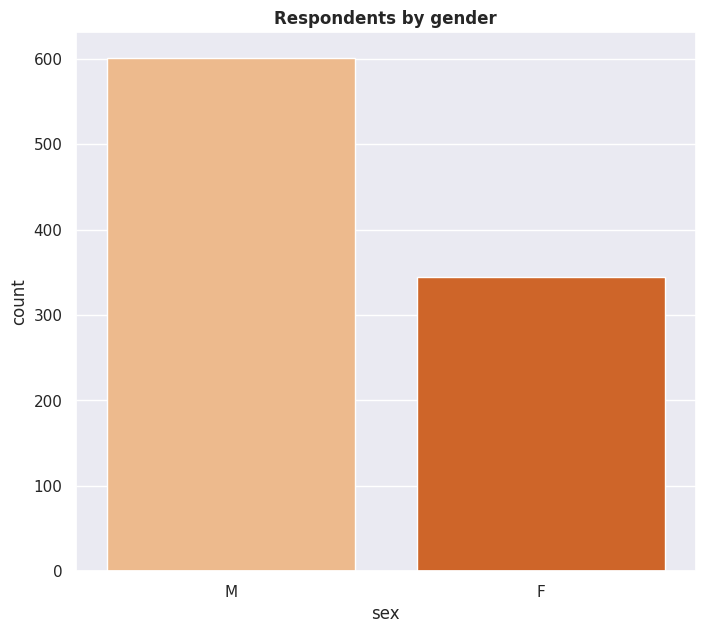

In [ ]:
colors = ( '#B97A67','#E1A292','#F1C6B8','#F3DDD4','#EEE8E4')
fig = plt.figure(figsize=(8,7))
sns.countplot(x ='sex', data = df_fix, hue='sex', palette = 'Oranges')
plt.title("Respondents by gender", fontweight="bold")
plt.show()

<ipython-input-32-c2aa9fb7f0fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y ='main.disorder',


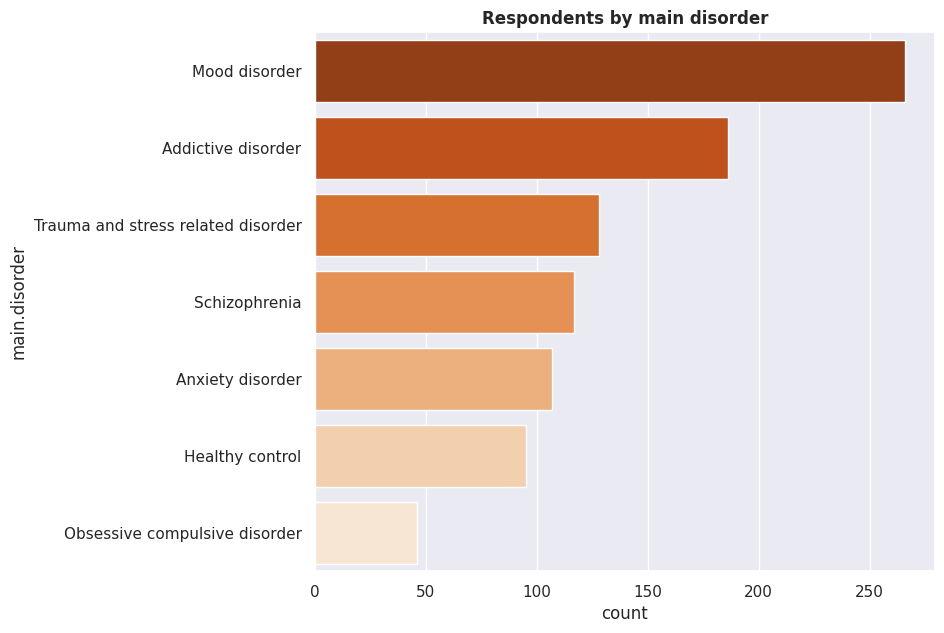

In [ ]:
fig = plt.figure(figsize=(8,7))
sns.countplot(y ='main.disorder',
              data = df,
              palette = 'Oranges_r',order = df['main.disorder'].value_counts().index)
plt.title("Respondents by main disorder", fontweight="bold")
plt.show()

<ipython-input-33-01dbed58d1ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y ='specific.disorder',


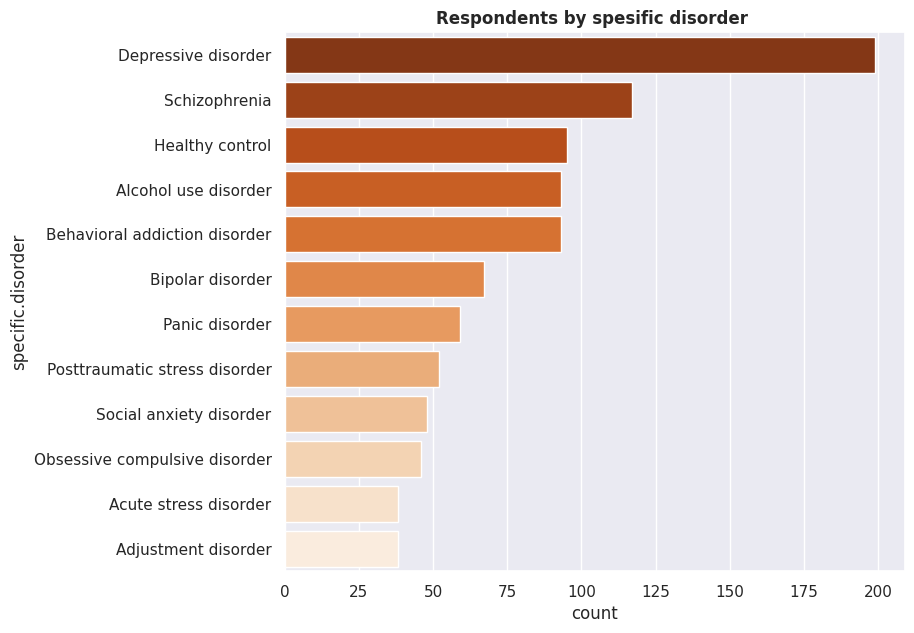

In [ ]:
fig = plt.figure(figsize=(8,7))
ax = sns.countplot(y ='specific.disorder',
              data = df_fix,
              palette = 'Oranges_r',order = df_fix['specific.disorder'].value_counts().index)
plt.title("Respondents by spesific disorder ", fontweight="bold")
plt.show()

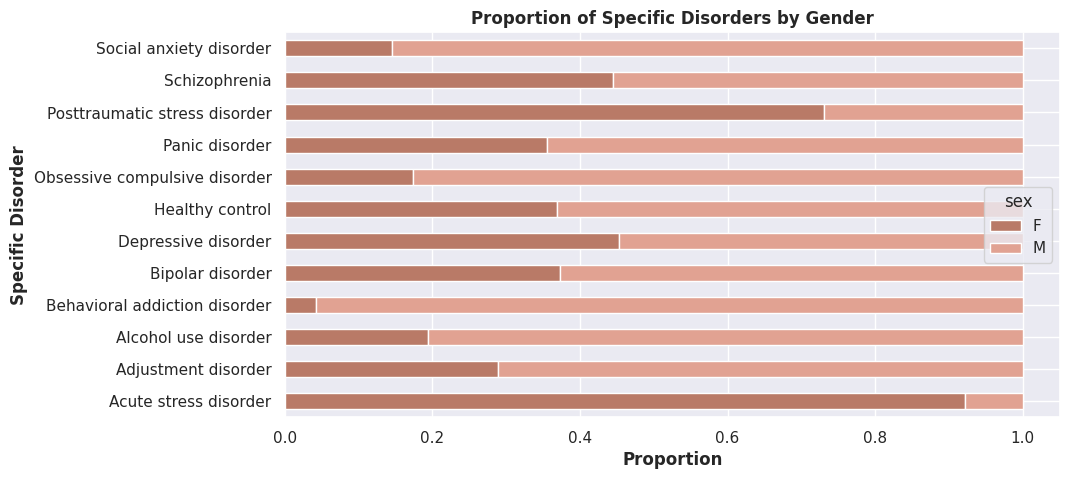

In [ ]:
# proportion of high-end models in each CarName
pd.crosstab(df_fix["specific.disorder"], df_fix["sex"], normalize="index").plot.barh(stacked=True, figsize=(10,5),color=colors)
plt.xlabel("Proportion", fontweight="bold")
plt.ylabel("Specific Disorder", fontweight="bold")
plt.title("Proportion of Specific Disorders by Gender", fontweight="bold")
plt.show()

In [ ]:
tabvis= df_fix[['age','specific.disorder','education','IQ']]
tabvis

age     specific.disorder  education     IQ
0    57.0  Alcohol use disorder       13.0  102.0
1    37.0  Alcohol use disorder        6.0  120.0
2    32.0  Alcohol use disorder       16.0  113.0
3    35.0  Alcohol use disorder       18.0  126.0
4    36.0  Alcohol use disorder       16.0  112.0
..    ...                   ...        ...    ...
940  22.0       Healthy control       13.0  116.0
941  26.0       Healthy control       13.0  118.0
942  26.0       Healthy control       16.0  113.0
943  24.0       Healthy control       13.0  107.0
944  21.0       Healthy control       13.0  105.0

[945 rows x 4 columns]

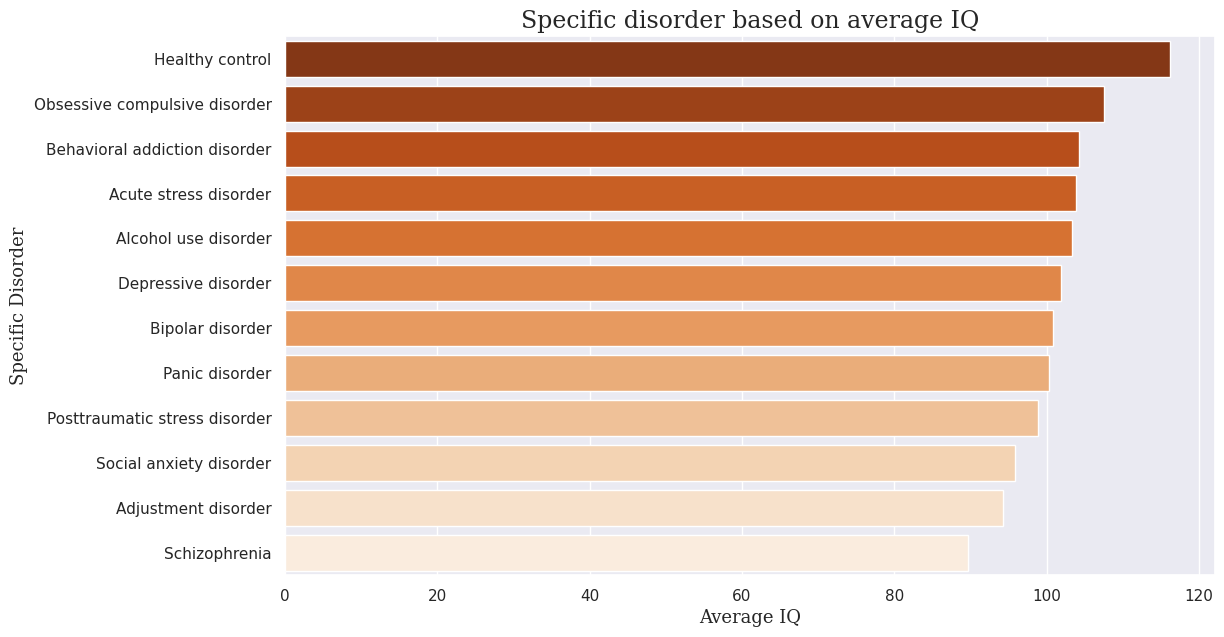

In [ ]:
lk_1=tabvis.groupby('specific.disorder').mean()['IQ'].sort_values(ascending=False).rename_axis('spesific').reset_index(name='average')
fig = plt.figure(figsize=(12,7))
ax=sns.barplot(x='average', y='spesific',data=lk_1, hue='spesific' , palette='Oranges_r')
plt.title("Specific disorder based on average IQ",weight='book', size=17, fontfamily='serif')
plt.xlabel("Average IQ", size=13,weight='book', fontfamily='serif',)
plt.ylabel('Specific Disorder',size=13,weight='book', fontfamily='serif')
plt.show()

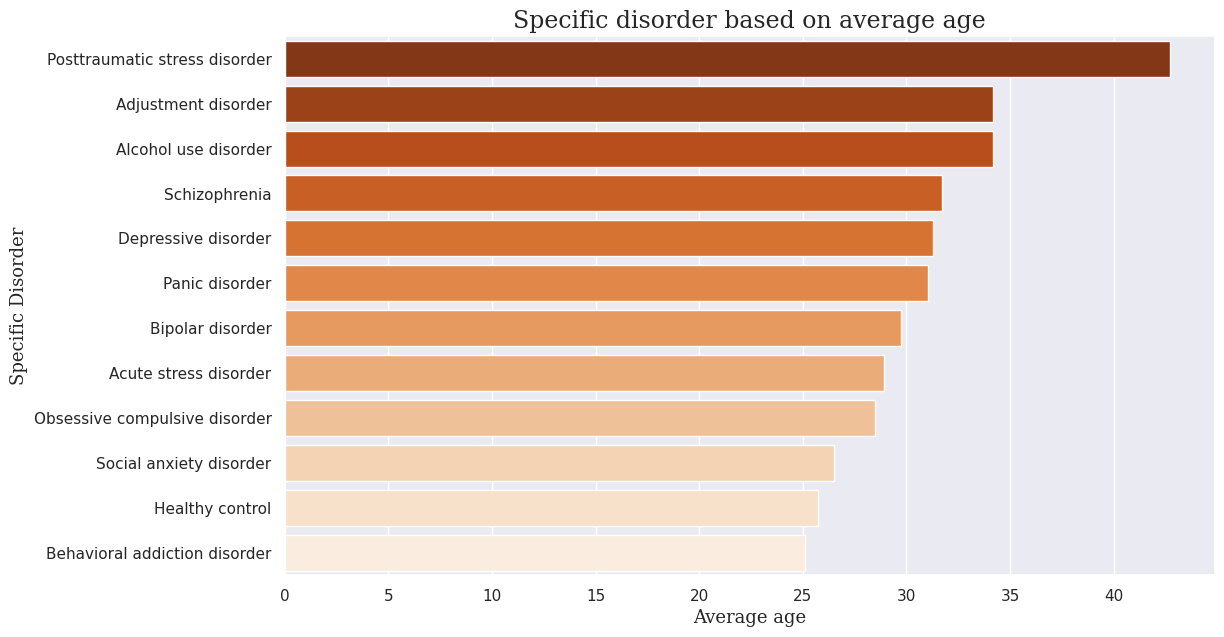

In [ ]:
lk_2=tabvis.groupby('specific.disorder').mean()['age'].sort_values(ascending=False).rename_axis('spesific').reset_index(name='average')
fig = plt.figure(figsize=(12,7))
ax=sns.barplot(x='average', y='spesific', data=lk_2, hue='spesific' , palette='Oranges_r')
plt.title("Specific disorder based on average age",weight='book', size=17, fontfamily='serif')
plt.xlabel("Average age", size=13,weight='book', fontfamily='serif',)
plt.ylabel('Specific Disorder',size=13,weight='book', fontfamily='serif')
plt.show()